In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the smaller file with court cases
court = pd.read_csv("data1k.csv")
court.head(1).T

,0
person_id,199031000000439
HearingDate,2018-06-01
CodeSection,A.46.2-862
codesection,covered elsewhere
ChargeType,Misdemeanor
chargetype,Misdemeanor
Class,NaN
DispositionCode,Guilty
disposition,Conviction
Plea,NaN


In [3]:
# Check how Race is coded
court.Race.value_counts()

White Caucasian(Non-Hispanic)                  1093
Black(Non-Hispanic)                             864
White Caucasian (Non-Hispanic)                  342
Black (Non-Hispanic)                            311
Hispanic                                         88
Asian Or Pacific Islander                        27
Other(Includes Not Applicable.. Unknown)         27
White                                            17
Unknown (Includes Not Applicable.. Unknown)      11
MISSING                                          10
Black                                            10
Other (Includes Not Applicable.. Unknown)         8
American Indian                                   3
Name: Race, dtype: int64

In [4]:
# Get all the labels used in Race column
court.Race.unique()

array(['Black(Non-Hispanic)', 'White Caucasian (Non-Hispanic)',
       'Hispanic', 'White Caucasian(Non-Hispanic)',
       'Black (Non-Hispanic)', 'Asian Or Pacific Islander',
       'Other(Includes Not Applicable.. Unknown)',
       'Other (Includes Not Applicable.. Unknown)', 'MISSING',
       'Unknown (Includes Not Applicable.. Unknown)', 'Black', 'White',
       'American Indian'], dtype=object)

In [5]:
# Decide on what labels to use in the further research
replace_map = {'Black(Non-Hispanic)': 'Black (Non-Hispanic)', 
               'Hispanic': 'Hispanic', 
               'White Caucasian(Non-Hispanic)': 'White (Non-Hispanic)',
               'MISSING': 'Missing or Other', 
               'Asian Or Pacific Islander': 'Asian or Pacific Islander', 
               'Black (Non-Hispanic)': 'Black (Non-Hispanic)',
               'White Caucasian (Non-Hispanic)': 'White (Non-Hispanic)',
               'Other(Includes Not Applicable.. Unknown)': 'Missing or Other',
               'Other (Includes Not Applicable.. Unknown)': 'Missing or Other', 
               'Black': 'Black (Non-Hispanic)', 
               'White': 'White (Non-Hispanic)',
               'Unknown (Includes Not Applicable.. Unknown)': 'Missing or Other', 
               'American Indian': 'American Indian or Alaskan Native',
               'Unknown': 'Missing or Other', 
               'Asian or Pacific Islander': 'Asian or Pacific Islander',
               'American Indian Or Alaskan Native': 'American Indian or Alaskan Native'}

# Remap the Rade labels used replace_map
court['Race']= court.Race.replace(replace_map)

In [6]:
# Check the results
court.Race.value_counts()

White (Non-Hispanic)                 1452
Black (Non-Hispanic)                 1185
Hispanic                               88
Missing or Other                       56
Asian or Pacific Islander              27
American Indian or Alaskan Native       3
Name: Race, dtype: int64

In [7]:
# Select columns of interest for further research 
my_columns = ['HearingDate', 'CodeSection', 'Race', 'disposition', 'fips', 'expungable']
court_small = court[my_columns]
court_small.head()

,HearingDate,CodeSection,Race,disposition,fips,expungable
0,2018-06-01,A.46.2-862,Black (Non-Hispanic),Conviction,117,Automatic (pending)
1,2000-08-07,18.2-26,White (Non-Hispanic),Conviction,191,Petition
2,2000-08-07,18.2-95,White (Non-Hispanic),Conviction,191,Petition
3,2019-09-25,46.2-300,Hispanic,Conviction,23,Automatic (pending)
4,2010-05-03,46.2-613(2),White (Non-Hispanic),Conviction,840,Automatic


In [8]:
# Check data types
court_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HearingDate  2811 non-null   object
 1   CodeSection  2811 non-null   object
 2   Race         2811 non-null   object
 3   disposition  2811 non-null   object
 4   fips         2811 non-null   int64 
 5   expungable   2811 non-null   object
dtypes: int64(1), object(5)
memory usage: 131.9+ KB


In [9]:
# Convert object type to datatime type
court_small['HearingDate'] = pd.to_datetime(court_small['HearingDate'])

<ipython-input-9-90779347dc0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  court_small['HearingDate'] = pd.to_datetime(court_small['HearingDate'])


In [10]:
# Alt., select just the year of hearing
court_small['year'] = court_small['HearingDate'].dt.year

<ipython-input-10-ee82c62a2914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  court_small['year'] = court_small['HearingDate'].dt.year


In [11]:
# Now we can aggregate using the "year" column
court_small.head()

,HearingDate,CodeSection,Race,disposition,fips,expungable,year
0,2018-06-01,A.46.2-862,Black (Non-Hispanic),Conviction,117,Automatic (pending),2018
1,2000-08-07,18.2-26,White (Non-Hispanic),Conviction,191,Petition,2000
2,2000-08-07,18.2-95,White (Non-Hispanic),Conviction,191,Petition,2000
3,2019-09-25,46.2-300,Hispanic,Conviction,23,Automatic (pending),2019
4,2010-05-03,46.2-613(2),White (Non-Hispanic),Conviction,840,Automatic,2010


In [12]:
court_small.query("year >= 2021").sort_values('HearingDate', ascending=False)

,HearingDate,CodeSection,Race,disposition,fips,expungable,year
605,2024-04-16,18.2-95,White (Non-Hispanic),Conviction,550,Not eligible,2024
606,2024-04-16,18.2-23,White (Non-Hispanic),Conviction,550,Not eligible,2024
607,2024-04-16,18.2-108.01,White (Non-Hispanic),Conviction,550,Not eligible,2024
834,2021-01-30,18.2-248,White (Non-Hispanic),Conviction,161,Not eligible,2021


In [13]:
# Note years after 2020, they should not be in the dataset 
court_small['Automatic'] = court_small['expungable'] == "Automatic"
court_small.groupby('year').agg({'Automatic':'sum'})

<ipython-input-13-4f92f0cc06f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  court_small['Automatic'] = court_small['expungable'] == "Automatic"


,Automatic
year,
2000,1
2001,5
2002,7
2003,1
2004,4
2005,3
2006,5
2007,4
2008,2


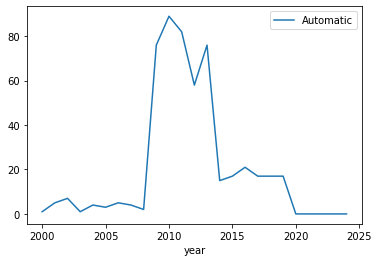

In [14]:
court_small.groupby('year').agg({'Automatic':'sum'}).plot.line()

In [15]:
court_small.groupby(['year', 'expungable']).size().reset_index().head(10)

,year,expungable,0
0,2000,Automatic,1
1,2000,Not eligible,16
2,2000,Petition,9
3,2001,Automatic,5
4,2001,Not eligible,15
5,2001,Petition,13
6,2002,Automatic,7
7,2002,Not eligible,25
8,2002,Petition,10
9,2003,Automatic,1


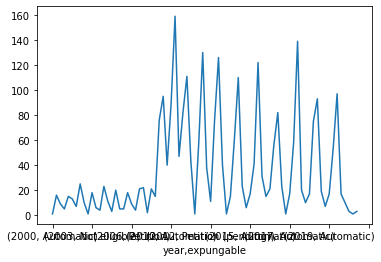

In [16]:
court_small.groupby(['year', 'expungable']).size().plot.line()

In [17]:
court_small.groupby(['Race', 'expungable']).size().reset_index().head(10)

,Race,expungable,0
0,American Indian or Alaskan Native,Automatic,2
1,American Indian or Alaskan Native,Automatic (pending),1
2,Asian or Pacific Islander,Automatic,12
3,Asian or Pacific Islander,Automatic (pending),5
4,Asian or Pacific Islander,Not eligible,6
5,Asian or Pacific Islander,Petition,3
6,Asian or Pacific Islander,Petition (pending),1
7,Black (Non-Hispanic),Automatic,141
8,Black (Non-Hispanic),Automatic (pending),117
9,Black (Non-Hispanic),Not eligible,724


In [18]:
# Most "popular" code sections:
court_small['CodeSection'].value_counts()

B.46.2-301        268
A.46.2-862        253
46.2-300          177
C.46.2-862        123
18.2-250.1         96
                 ... 
A.46.2-704          1
4VAC20-1250-30      1
14-104              1
F.46.2-875          1
46.2-1052           1
Name: CodeSection, Length: 345, dtype: int64

In [19]:
# Loading fips
fips = pd.read_csv('fips.csv')
fips.head(2)

,fips,name
0,1,Accomack Circuit Court
1,3,Albemarle Circuit Court


## 2. Load the Cooper demographics data

In [20]:
url = 'https://demographics.coopercenter.org/sites/demographics/files/media/files/2020-07/Census_2019_RaceEstimates_forVA_0.xls'
cooper_race = pd.read_excel(url, header=5)
cooper_race.head()




,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Virginia,8535519.0,5922648.0,0.693883,1696911.0,0.198806,589710.0,0.069089,56694.0,0.006642,269556.0,0.031581
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Accomack County,32316.0,21899.0,0.677652,9304.0,0.287907,257.0,0.007953,293.0,0.009067,563.0,0.017422
3,3.0,Albemarle County,109330.0,89388.0,0.817598,10600.0,0.096954,6051.0,0.055346,483.0,0.004418,2808.0,0.025684
4,5.0,Alleghany County,14860.0,13783.0,0.927524,698.0,0.046972,46.0,0.003096,56.0,0.003769,277.0,0.018641


## 3. Load the Cooper hispanic data

In [22]:
url2 = 'https://demographics.coopercenter.org/sites/demographics/files/media/files/2020-07/Census_2019_HispanicEstimates_forVA_0.xls'
cooper_hisp = pd.read_excel(url2, header=5)
cooper_hisp.head()





,Unnamed: 0,Unnamed: 1,Total Population,Hispanic Population,Unnamed: 4,Total Population.1,Hispanic Population.1,Unnamed: 7,Hispanic Change,Unnamed: 9
0,NaN,NaN,NaN,Total Hispanic,(%),NaN,Total Hispanic,(%),Total Hispanic,(%)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Virginia,8001024.0,631825,0.078968,8535519.0,834422,0.097759,202597,0.320654
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,"Accomack County, Virginia",33164.0,2850,8.593656,32316.0,2955,0.091441,105,0.036842


## 4. Merge the Cooper files

In [23]:
cooper = pd.merge(cooper_race, cooper_hisp, 
                  how='outer',
                  indicator='matched',
                  validate='one_to_one'
                 )

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
cooper.matched.value_counts()

## 5. Reshape so that we have different columns by Race

## 6. Merge Cooper with the Courts' data